---
title: AutoRegressive (AR) Models
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

We will fit AutoRegressive Models to some time series datasets, and obtain predictions for future values of the time series. 

## Dataset One: Liquor Sales Data from FRED

  observation_date  MRTSSM4453USN
0       1992-01-01           1509
1       1992-02-01           1541
2       1992-03-01           1597
3       1992-04-01           1675
4       1992-05-01           1822


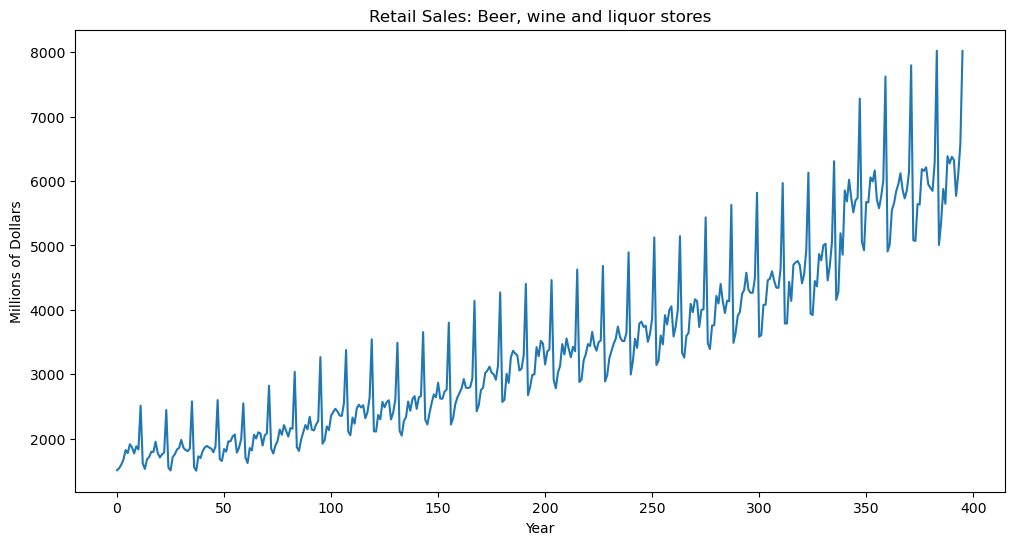

In [3]:
#The following is FRED data on retail sales (in millions of dollars) for beer, wine and liquor stores (https://fred.stlouisfed.org/series/MRTSSM4453USN)
beersales = pd.read_csv('MRTSSM4453USN_March2025.csv')
print(beersales.head())
y = beersales['MRTSSM4453USN'].to_numpy()
plt.figure(figsize = (12, 6))
plt.plot(y)
plt.xlabel('Year')
plt.ylabel('Millions of Dollars')
plt.title('Retail Sales: Beer, wine and liquor stores')
plt.show()

AutoRegressive (AR) models are a simple way for obtaining forecasts (predictions) for future values of the time series. 

In [5]:
p = 12 #this is the order of the AR model
n = len(y)
print(n)
print(y)

396
[1509 1541 1597 1675 1822 1775 1912 1862 1770 1882 1831 2511 1614 1529
 1678 1713 1796 1792 1950 1777 1707 1757 1782 2443 1548 1505 1714 1757
 1830 1857 1981 1858 1823 1806 1845 2577 1555 1501 1725 1699 1807 1863
 1886 1861 1845 1788 1879 2598 1679 1652 1837 1798 1957 1958 2034 2062
 1781 1860 1992 2547 1706 1621 1853 1817 2060 2002 2098 2079 1892 2050
 2082 2821 1846 1768 1894 1963 2140 2059 2209 2118 2031 2163 2154 3037
 1866 1808 1986 2099 2210 2145 2339 2140 2126 2219 2273 3265 1920 1976
 2190 2132 2357 2413 2463 2422 2358 2352 2549 3375 2109 2052 2327 2231
 2470 2526 2483 2518 2316 2409 2638 3542 2114 2109 2366 2300 2569 2486
 2568 2595 2297 2401 2601 3488 2121 2046 2273 2333 2576 2433 2611 2660
 2461 2641 2660 3654 2293 2219 2398 2553 2685 2643 2867 2622 2618 2727
 2763 3801 2219 2316 2530 2640 2709 2783 2924 2791 2784 2801 2933 4137
 2424 2519 2753 2791 3017 3055 3117 3024 2997 2913 3137 4269 2569 2603
 3005 2867 3262 3364 3322 3292 3057 3087 3297 4403 2675 2806 2989 2997
 3

AR models work just like regression. The response vector and design matrix in the regression are set up as follows. 

In [6]:
yreg = y[p:] #these are the response values in the autoregression
Xmat = np.ones((n-p, 1)) #this will be the design matrix (X) in the autoregression
for j in range(1, p+1):
    col = y[p-j : n-j]
    Xmat = np.column_stack([Xmat, col])
print(Xmat.shape)
print(Xmat)

(384, 13)
[[1.000e+00 2.511e+03 1.831e+03 ... 1.597e+03 1.541e+03 1.509e+03]
 [1.000e+00 1.614e+03 2.511e+03 ... 1.675e+03 1.597e+03 1.541e+03]
 [1.000e+00 1.529e+03 1.614e+03 ... 1.822e+03 1.675e+03 1.597e+03]
 ...
 [1.000e+00 5.768e+03 6.324e+03 ... 8.023e+03 6.288e+03 5.847e+03]
 [1.000e+00 6.104e+03 5.768e+03 ... 5.007e+03 8.023e+03 6.288e+03]
 [1.000e+00 6.577e+03 6.104e+03 ... 5.360e+03 5.007e+03 8.023e+03]]


In [7]:
armod = sm.OLS(yreg, Xmat).fit()
print(armod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2552.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:45:11   Log-Likelihood:                -2478.8
No. Observations:                 384   AIC:                             4984.
Df Residuals:                     371   BIC:                             5035.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.7845     22.657     -0.697      0.4

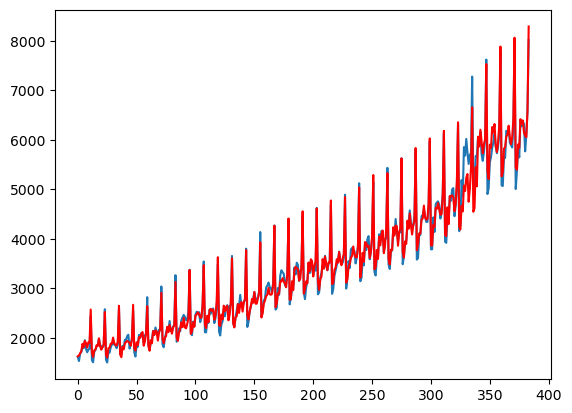

In [8]:
arfitted = armod.fittedvalues
#Plotting the original data and the fitted values: 
plt.plot(figure = (12, 6))
plt.plot(yreg)
plt.plot(arfitted, color = 'red', label = 'Fitted')
plt.show()

In [9]:
#Generate k-step ahead forecasts: 
k = 100
yhat = np.concatenate([y, np.full(k, -9999)]) #extend data by k placeholder values
for i in range(1, k+1):
    ans = armod.params[0]
    for j in range(1, p+1):
        ans += armod.params[j] * yhat[n+i-j-1]
    yhat[n+i-1] = ans
predvalues = yhat[n:]


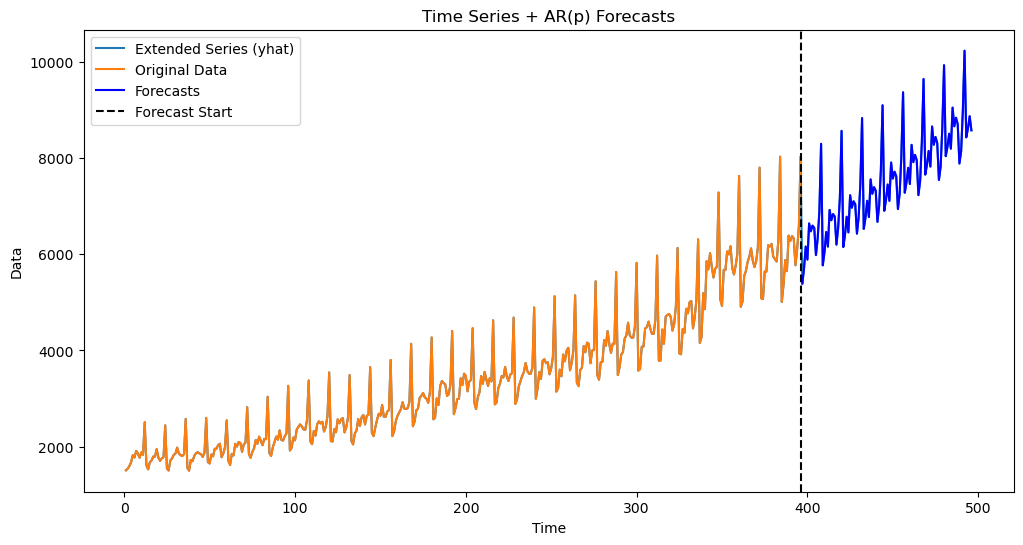

In [10]:
#Plotting the series with forecasts: 
plt.figure(figsize=(12, 6))
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat, label='Extended Series (yhat)', color='C0')
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), predvalues, label='Forecasts', color='blue')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

The predictions depend crucially on the order $p$ of the model. If $p \geq 12$, we get reasonable predictions. However for smaller values of $p$, the predictions look very unnatural. Go back and repeat the code above for other values of $p$. 

## Dataset Two: House Price Data from FRED

  observation_date  ASPUS
0       1963-01-01  19300
1       1963-04-01  19400
2       1963-07-01  19200
3       1963-10-01  19600
4       1964-01-01  19600


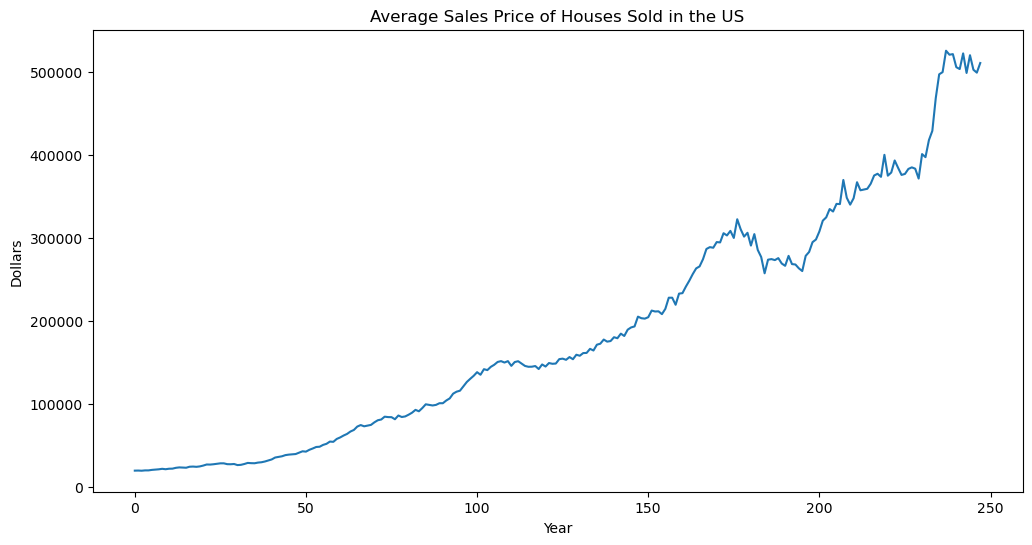

In [157]:
#The following is FRED data on Average Sales Price of Houses Sold for the US (https://fred.stlouisfed.org/series/ASPUS)
hprice = pd.read_csv('ASPUS_March2025.csv')
print(hprice.head())
y = hprice['ASPUS'].to_numpy()
plt.figure(figsize = (12, 6))
plt.plot(y)
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.title('Average Sales Price of Houses Sold in the US')
plt.show()

In [164]:
p = 30 #this is the order of the AR model
n = len(y)
print(n)

248


In [165]:
yreg = y[p:] #these are the response values in the autoregression
Xmat = np.ones((n-p, 1)) #this will be the design matrix (X) in the autoregression
for j in range(1, p+1):
    col = y[p-j : n-j].reshape(-1, 1)
    Xmat = np.column_stack([Xmat, col])
print(Xmat.shape)
print(y)

(218, 31)
[ 19300  19400  19200  19600  19600  20200  20500  20900  21500  21000
  21600  21700  22700  23200  23000  22800  24000  24200  23900  24400
  25400  26700  26600  27000  27600  28100  28100  27100  27000  27300
  26000  26300  27300  28600  28300  28200  29000  29400  30300  31600
  32800  35100  35900  36600  38000  38600  39000  39300  40900  42600
  42200  44400  46000  47800  48100  50300  51600  54300  54000  57500
  59300  61600  63500  66400  68300  72400  74200  72700  73600  74400
  77500  80000  80900  84300  83800  83700  81200  85700  83900  84600
  86700  89100  92500  90800  94700  99200  98500  97800  98500 100500
 100500 103800 106300 112000 114400 115600 120800 126100 129900 133500
 137900 134800 141500 140400 144300 146800 150200 151200 149500 151200
 145500 150100 151100 148200 145400 144400 144500 145300 141700 147200
 144700 148900 148000 148300 153600 154200 152800 156100 153500 158900
 157700 160900 161100 166000 164000 171000 172200 177200 174700 175

In [166]:
armod = sm.OLS(yreg, Xmat).fit()
print(armod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2805.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          8.59e-232
Time:                        16:17:10   Log-Likelihood:                -2216.9
No. Observations:                 218   AIC:                             4496.
Df Residuals:                     187   BIC:                             4601.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1362.7186    893.733      1.525      0.1

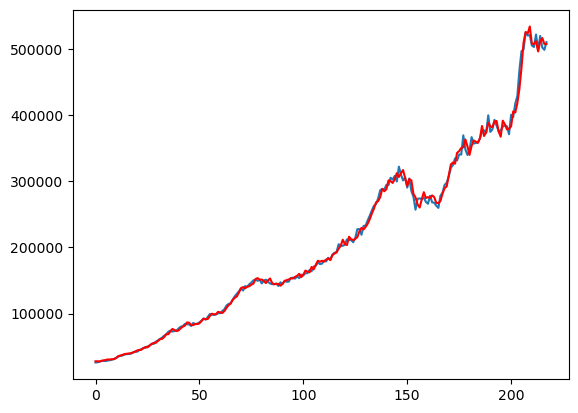

In [167]:
arfitted = armod.fittedvalues
#Plotting the original data and the fitted values: 
plt.plot(figure = (12, 6))
plt.plot(yreg)
plt.plot(arfitted, color = 'red', label = 'Fitted')
plt.show()

In [168]:
#Generate k-step ahead forecasts: 
k = 100
yhat = np.concatenate([y, np.full(k, -9999)]) #extend data by k placeholder values
for i in range(1, k+1):
    ans = armod.params[0]
    for j in range(1, p+1):
        ans += armod.params[j] * yhat[n+i-j-1]
    yhat[n+i-1] = ans
predvalues = yhat[n:]

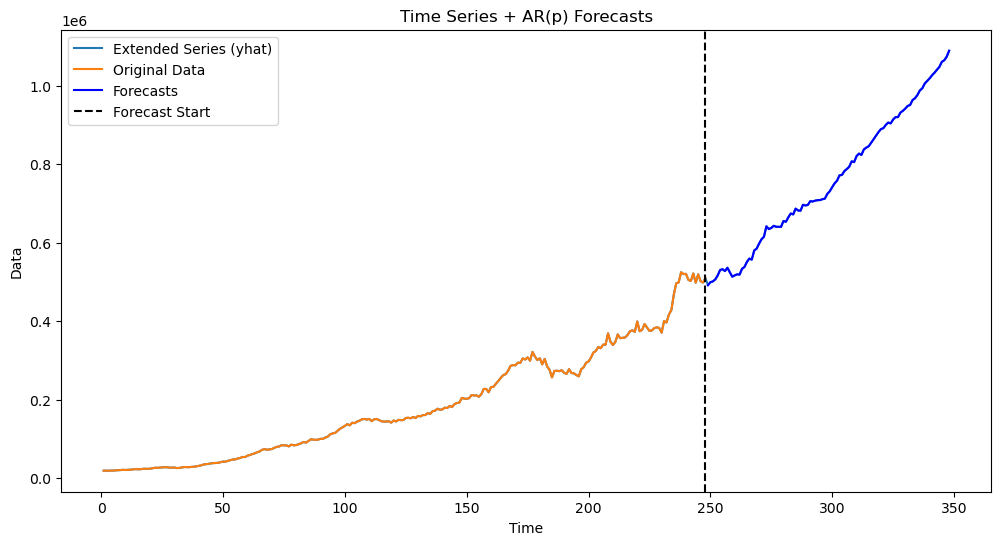

In [169]:
#Plotting the series with forecasts: 
plt.figure(figsize=(12, 6))
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat, label='Extended Series (yhat)', color='C0')
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), predvalues, label='Forecasts', color='blue')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

Repeat the above code for different values of $p$ to see how the predictions change. 

## Sunspots Data

We will apply AR models to the sunspots data and obtain predictions. 

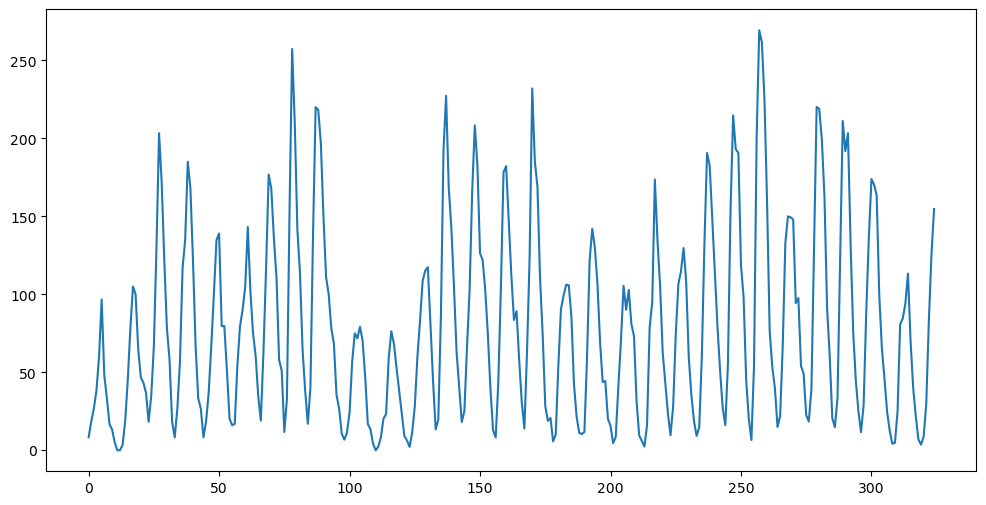

In [17]:
sunspots = pd.read_csv('SN_y_tot_V2.0.csv', header = None, sep = ';')
y = sunspots.iloc[:,1].values
n = len(y)
plt.figure(figsize = (12, 6))
plt.plot(y)
plt.show()

### Yule Model

Yule model is given by: 
\begin{equation*}
   y_t = \phi_0 + \phi_1 y_{t-1} - y_{t-2} + \epsilon_t
\end{equation*}
Note that $\phi_2$ in the usual AR(2) model is set to -1 above. Also $\phi_1$ is given by $2 \cos(2 \pi f)$. The above model can be rewritten as 
\begin{equation*}
  y_t + y_{t-2} = \phi_0 + \phi_1 y_{t-1} + \epsilon_t
\end{equation*}
so we can estimate $\phi_0$ and $\phi_1$ by regressing $y_t + y_{t-2}$ on $y_{t-1}$. 

In [18]:
p = 2
yreg = y[p:]
x1 = y[1:-1]
x2 = y[:-2]
Xmat = np.column_stack([np.ones(len(yreg)), x1])
print(Xmat.shape)

(323, 2)


In [19]:
y_adjusted = yreg + x2
yulemod = sm.OLS(y_adjusted, Xmat).fit()
print(yulemod.summary())
print(yulemod.params)
slpe_est = yulemod.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     4254.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          2.90e-187
Time:                        23:52:45   Log-Likelihood:                -1532.1
No. Observations:                 323   AIC:                             3068.
Df Residuals:                     321   BIC:                             3076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6834      2.511     11.421      0.0

From the estimate for $\phi_1$, the frequency parameter can be estimated using the relation: $\phi_1 = 2 \cos (2 \pi f)$. 

In [20]:
yulefhat = np.arccos(slpe_est/2) / (2 * np.pi)
print(1/yulefhat)

10.25917614343964


The period corresponding to this frequency is $10.259$ which is smaller than the period of 11 that we get by fitting $y_t = \beta_0 + \beta_1 \cos(2 \pi f t) + \beta_2 \sin(2 \pi f t) + \epsilon_t$. 

In [21]:
#Generate k-step ahead forecasts: 
k = 100
yhat = np.concatenate([y, np.full(k, -9999)]) #extend data by k placeholder values
for i in range(1, k+1):
    ans = yulemod.params[0] - yhat[n+i-3]
    ans += yulemod.params[1] * yhat[n+i-2]
    yhat[n+i-1] = ans
predvalues = yhat[n:]
print(predvalues)
print(yhat)

[ 1.56348277e+02  1.29845664e+02  8.48261433e+01  3.76547907e+01
  5.47889486e+00 -5.26328291e-03  2.31958661e+01  6.66484255e+01
  1.14556947e+02  1.49506172e+02  1.58791685e+02  1.39038104e+02
  9.74260659e+01  4.90819890e+01  1.15794607e+01 -1.44895065e+00
  1.47327213e+01  5.42422665e+01  1.02717544e+02  1.42537275e+02
  1.59226562e+02  1.46718673e+02  1.09560357e+02  6.12590590e+01
  1.93728148e+01 -8.72279635e-01  7.88308317e+00  4.24562356e+01
  9.02794685e+01  1.33968527e+02  1.57641974e+02  1.52694258e+02
  1.20923928e+02  7.38798357e+01  2.86630109e+01  1.71025067e+00
  2.81917042e+00  3.15866660e+01  7.75554463e+01  1.24015370e+02
  1.54077760e+02  1.56814618e+02  1.31231066e+02  8.66269979e+01
  3.92164679e+01  6.23370836e+00 -3.31696240e-01  2.19068486e+01
  6.48653949e+01  1.12928054e+02  1.48623536e+02  1.58976155e+02
  1.40222622e+02  9.91800471e+01  5.07678428e+01  1.25843613e+01
 -1.49029536e+00  1.36601606e+01  5.25283769e+01  1.00985343e+02
  1.41416436e+02  1.59124

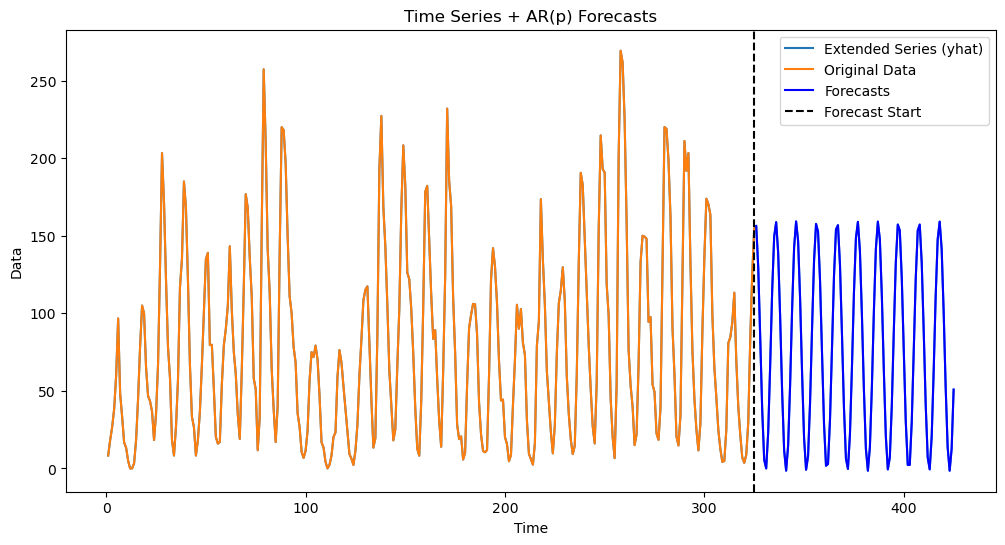

In [22]:
#Plotting the series with forecasts: 
plt.figure(figsize=(12, 6))
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat, label='Extended Series (yhat)', color='C0')
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), predvalues, label='Forecasts', color='blue')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

The predictions above are perfectly sinusoidal. Because the cycles for the sunspots data are irregular and can have different periods, there is a danger that these perfectly sinusoidal predictions can get out of phase sometimes leading to loss of prediction accuracy. 

Below, we simulate datasets using the Yule model. 

27.77831798002467


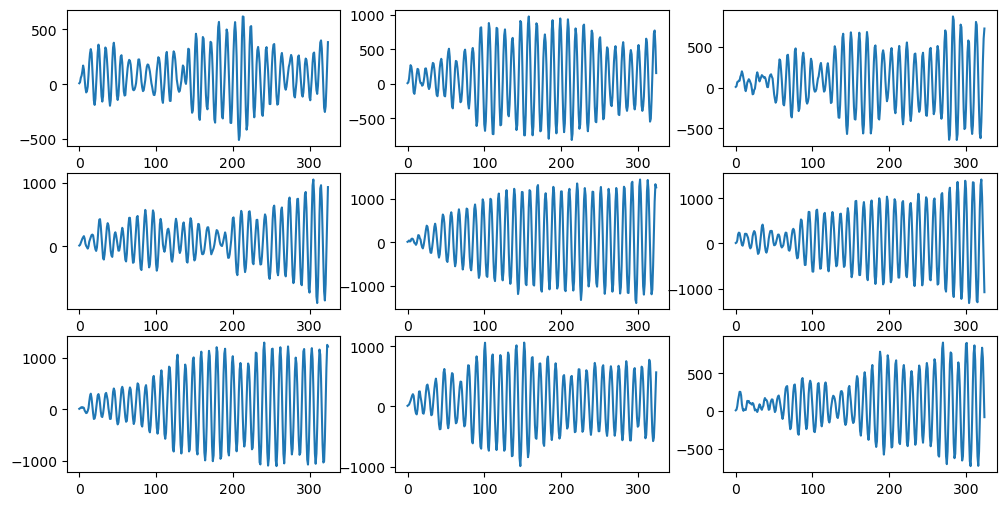

In [24]:
#Simulating from the Yule Model:
rng = np.random.default_rng(seed = 42)
sighat = np.sqrt(np.mean(yulemod.resid ** 2))
print(sighat)
fig, axes = plt.subplots(3, 3, figsize = (12, 6))
axes = axes.flatten()
for j in range(9):
    ysim = y.copy()
    for i in range(2, n):
        err = rng.normal(loc = 0, scale = sighat, size = 1)
        ysim[i] = yulemod.params[0] + yulemod.params[1] * ysim[i-1] - ysim[i-2] + err[0]
    axes[j].plot(ysim)
plt.show()

These datasets are quite smooth. This shows that the two "sinusoid + noise" models described in lecture are fundamentally different.

## AR(2) Model

Now we apply the AR(2) model to the sunspots dataset. 

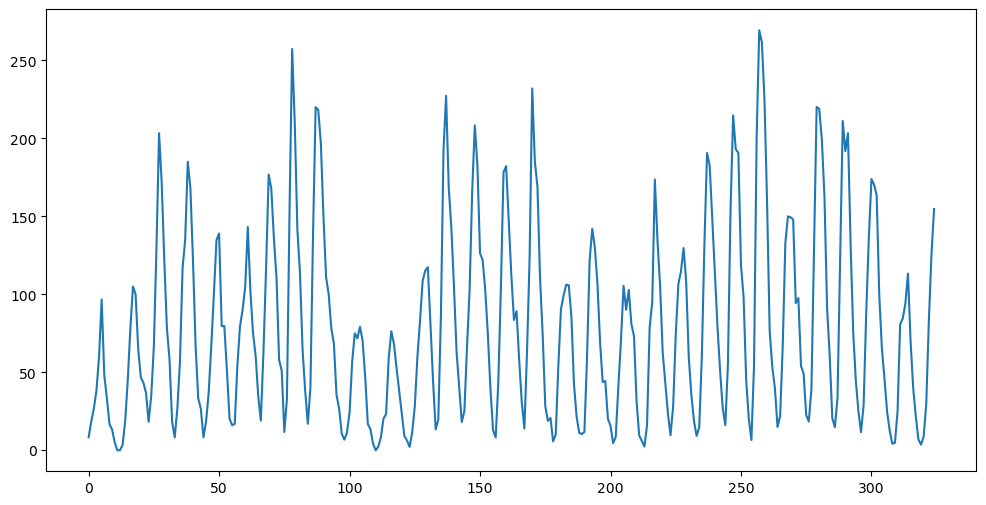

In [25]:
sunspots = pd.read_csv('SN_y_tot_V2.0.csv', header = None, sep = ';')
y = sunspots.iloc[:,1].values
n = len(y)
plt.figure(figsize = (12, 6))
plt.plot(y)
plt.show()

In [26]:
p = 2 #this is the order of the AR model
n = len(y)
print(n)

325


In [27]:
yreg = y[p:] #these are the response values in the autoregression
Xmat = np.ones((n-p, 1)) #this will be the design matrix (X) in the autoregression
for j in range(1, p+1):
    col = y[p-j : n-j].reshape(-1, 1)
    Xmat = np.column_stack([Xmat, col])

In [28]:
armod = sm.OLS(yreg, Xmat).fit()
print(armod.params)
print(armod.summary())
sighat = np.sqrt(np.mean(armod.resid ** 2))
print(sighat)

[24.45610705  1.38803272 -0.69646032]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     774.7
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          2.25e-123
Time:                        23:57:29   Log-Likelihood:                -1505.5
No. Observations:                 323   AIC:                             3017.
Df Residuals:                     320   BIC:                             3028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

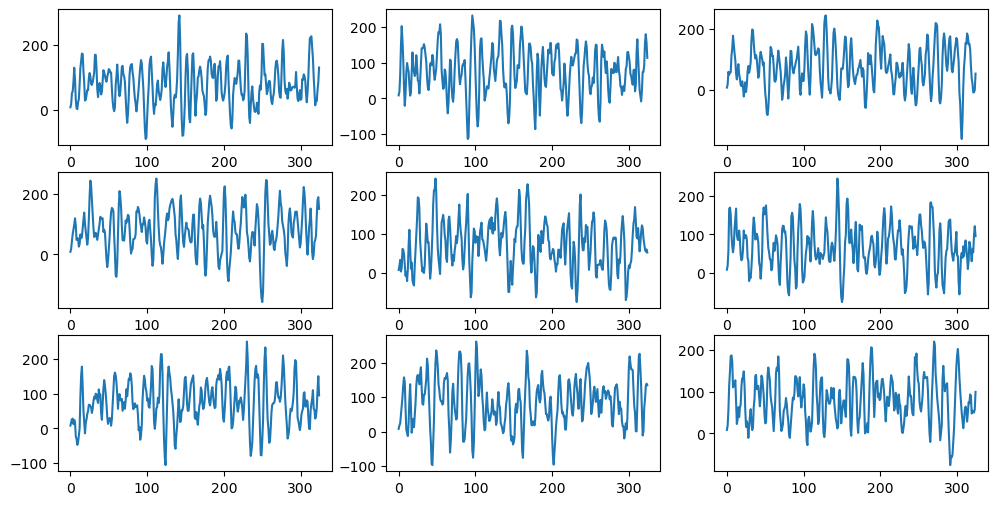

In [30]:
#Simulations from the fitted AR(2) model:
fig, axes = plt.subplots(3, 3, figsize = (12, 6))
axes = axes.flatten()
for j in range(9):
    ysim = y.copy()
    for i in range(2, n):
        err = rng.normal(loc = 0, scale = sighat, size = 1)
        ysim[i] = armod.params[0] + armod.params[1] * ysim[i-1] + armod.params[2] * ysim[i-2] + err[0]
    axes[j].plot(ysim)
plt.show()

These datasets are still smooth (much smoother than observations simulated from $y_t = \beta_0 + \beta_1 \cos(2 \pi f t) + \beta_2 \sin(2 \pi f t) + \epsilon_t$). 

Below, we obtain predictions using the AR(2) model. 

In [33]:
#Generate k-step ahead forecasts: 
k = 100
yhat = np.concatenate([y, np.full(k, -9999)]) #extend data by k placeholder values
for i in range(1, k+1):
    ans = armod.params[0]
    for j in range(1, p+1):
        ans += armod.params[j] * yhat[n+i-j-1]
    yhat[n+i-1] = ans
predvalues = yhat[n:]


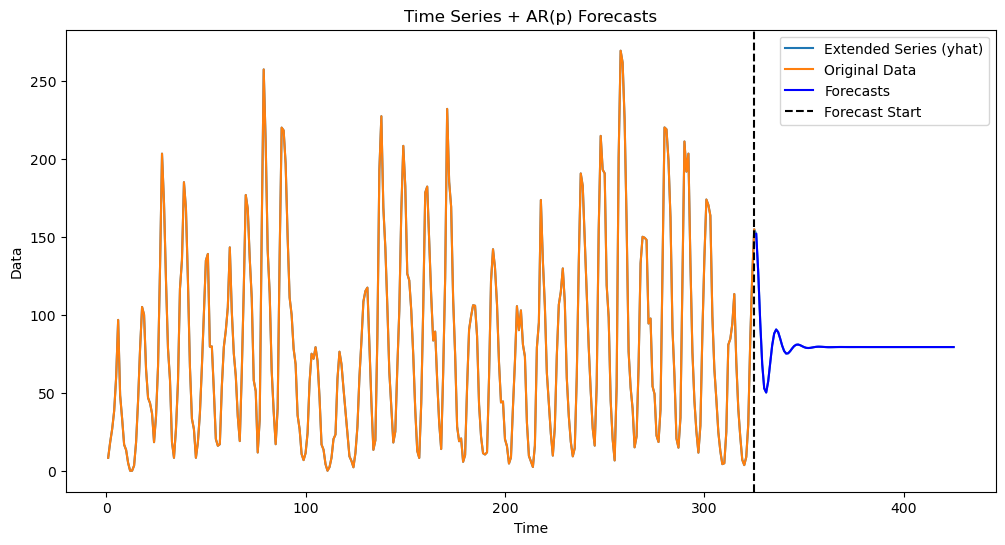

In [32]:
#Plotting the series with forecasts: 
plt.figure(figsize=(12, 6))
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat, label='Extended Series (yhat)', color='C0')
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), predvalues, label='Forecasts', color='blue')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

The predictions above are quite different from those obtained from the Yule model. The predictions actually are given be a damped sinusoid (as we shall see in the coming lectures). The predictions become flat after a few time points. When the cycles become irregular with varying periods, constant predictors might do well compared to sinusoidal predictors which may go out of phase at some places. 